In [39]:
import numpy as np
from scipy.misc import imread, imsave
from scipy.linalg import svd

from matplotlib import pyplot as plt

%matplotlib inline

110729
16


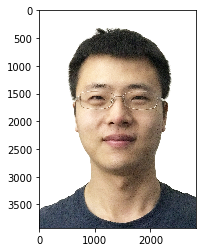

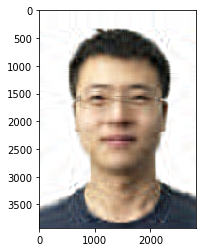

In [36]:
data = imread("../data/badge_photo.jpg")
recon = np.zeros(data.shape)

percent = 0.01
full = np.prod(data[:, :, 0].shape)
partial = int(full * percent)
print partial
pcs = int(partial / np.sum(data[:, :, 0].shape))
print pcs

U_list = []
S_list = []
Vh_list = []

plt.imshow(data)
plt.show()

for i in range(data.shape[2]):
    U, S, Vh = svd(data[:, :, i], full_matrices=False)
    U_list.append(U)
    S_list.append(S)
    Vh_list.append(Vh)
    layer = np.dot(np.dot(U[:, :pcs], np.diag(S[:pcs])), Vh[:pcs, :])
    recon[:, :, i] = layer

recon[recon > 255] = 255.
recon[recon < 0] = 0.
recon = recon.astype(np.uint8)  

plt.imshow(recon)
plt.show()

1107290
164


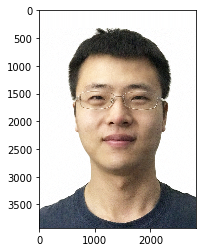

In [41]:
recon = np.zeros(data.shape)

percent = 0.10
full = np.prod(data[:, :, 0].shape)
partial = int(full * percent)
print partial
pcs = int(partial / np.sum(data[:, :, 0].shape))
print pcs

for i in range(data.shape[2]):
    U, S, Vh = U_list[i], S_list[i], Vh_list[i]
    layer = np.dot(np.dot(U[:, :pcs], np.diag(S[:pcs])), Vh[:pcs, :])
    recon[:, :, i] = layer
    
recon[recon > 255] = 255.
recon[recon < 0] = 0.
recon = recon.astype(np.uint8)  

plt.imshow(recon)
plt.show()

imsave("../data/badge_photo_compressed.jpg", recon)